<a href="https://colab.research.google.com/github/Lavan1999/Dataset-20_GarmentWorkerPrediction_RandomForest/blob/main/Garments_Workers_Productivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [ ]:
import pandas as pd
import numpy as np

#Connections
from google.colab import drive

#Statistic
from scipy import stats

#Visualization
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder, StandardScaler

#Machine Learning identifying algorithms/Model
from sklearn.model_selection import train_test_split
#from lazypredict.Supervised import LazyRegressor, LazyClassifier

#Machine Learning Training
# Regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

#Machine Learning Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score # Regression
from sklearn.metrics import top_k_accuracy_score, precision_score, recall_score # Classification

# **Connections**

In [ ]:
#Google drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Loading dataset**

In [ ]:
#Google drive
file_path = '/content/drive/My Drive/Dataset/Garments_worker_productivity.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.00,7080,98,0.00,0,0,59.00,0.94
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.00,0,0,8.00,0.89
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.00,3660,50,0.00,0,0,30.50,0.80
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.00,3660,50,0.00,0,0,30.50,0.80
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.00,1920,50,0.00,0,0,56.00,0.80


In [ ]:
df.shape

# **DataFrame observation**


In [ ]:
df.quarter.unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [ ]:
df.team.unique()

array([ 8,  1, 11, 12,  6,  7,  2,  3,  9, 10,  5,  4])

In [ ]:
df.columns

Index(['date', 'quarter', 'department', 'day', 'team', 'targeted_productivity',
       'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men',
       'no_of_style_change', 'no_of_workers', 'actual_productivity'],
      dtype='object')

In [ ]:
# Dependent -
# Independent -
continuous_columns = ["team", "smv","wip","over_time","incentive","idle_time","idle_men","actual_productivity","no_of_workers"]
category_columns = ["quarter",	"department",	"day", "date", "targeted_productivity",'no_of_style_change']

#Ssupervised

# **Data cleaning using pandas**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [ ]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [ ]:
df['wip'].fillna(0, inplace=True)

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.duplicated().sum()

0

In [ ]:
from datetime import datetime
df['date'] = pd.to_datetime(df['date'])

# **Hypothesis testing / Statistical analysis**


Continuous - Central Limit Theorem, 1-Tailed Test (one-sample t-test)

Continuous vs. Continuous - Correlation, 2-Tailed Test (two-sample t-test)

Continuous vs. Categorical - ANOVA (Analysis of Variance)

Categorical vs. Categorical - Chi-Square Test

In [ ]:
def hypothesisTesting(df, continuous_columns = [], category_columns = [], sampling_rate = 0.20, sampling_frac=0.05):
  df = df
  #Central Limit Theorem
  oneContinesColumn_result = {}
  hypothesis_df = pd.DataFrame(columns=df.columns, index=df.columns)
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      population=df[column].values
      population_mean = population.mean()
      sample_mean=[]
      for i in range(40):
        sample=np.random.choice(population,samplesize)
        sample_mean.append(sample.mean())
      oneContinesColumn_result[column] = {
                                          "Population Mean": population_mean,
                                          "Sample Means": {np.mean(sample_mean)}
                                          }

  #1-Tailed Test
  if continuous_columns:
    samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
    for column in continuous_columns:
      H0_accepted = 0
      H0_rejected = 0
      for i in range(samplesize):
        sample=df[column].sample(frac=sampling_frac)
        t_test,p_value=stats.ttest_1samp(sample,df[column].mean())
        if p_value > 0.5:
          H0_accepted += 1
        else:
          H0_rejected += 1

      if H0_accepted > H0_rejected:
          oneContinesColumn_result[column].update( {
                                            "H0_accepted": H0_accepted,
                                            "H0_rejected": H0_rejected,
                                            "Conclusion": "H0 is accepted, Ha is rejected, There is no significant effect"
                                          } )
          hypothesis_df[column][column] = "There is a relationship"

      else:
          oneContinesColumn_result[column].update( {
                                              "H0_accepted": H0_accepted,
                                              "H0_rejected": H0_rejected,
                                              "Conclusion": "H0 is rejected, Ha is accepted, There is a significant effect"
                                              } )
          hypothesis_df[column][column] = "There is no relationship"


  #2-Tailed Test
  for i in range(len(continuous_columns) - 1):
      column_1 = continuous_columns[i]
      for column_2 in continuous_columns[i+1:]:
        H0_accepted = 0
        H0_rejected = 0
        for i in range(20):
          sample1 = df[column_1].sample(frac=sampling_frac)
          sample2 = df[column_2].sample(frac=sampling_frac)
          t_test, p_value = stats.ttest_ind(sample1, sample2)
          if p_value > 0.5:
            H0_accepted += 1
          else:
            H0_rejected += 1

        if H0_accepted > H0_rejected:
          #H0 is accepted, Ha is rejected, There is no significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
          hypothesis_df[column_1][column_2] = "There is a relationship"
          hypothesis_df[column_2][column_1] = "There is a relationship"
        else:
          #H0 is rejected, Ha is accepted, There is a significant effect. "H0_accepted": H0_accepted, "H0_rejected": H0_rejected
            hypothesis_df[column_1][column_2] = "There is no relationship"
            hypothesis_df[column_2][column_1] = "There is no relationship"

  #Chi-Square Test
  if category_columns:
    for i in range(len(category_columns) - 1):
        column_1 = category_columns[i]
        for column_2 in category_columns[i + 1:]:
            data = pd.crosstab(df[column_1], df[column_2])
            observed_values = data.values
            chi2_stat, p_value, _, _ = stats.chi2_contingency(observed_values)

            if p_value > 0.05:
                # H0 is accepted, There is no relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "There is no relationship"
                hypothesis_df[column_2][column_1] = "There is no relationship"
            else:
                # H0 is rejected, There is a relationship between two columns we're comparing
                hypothesis_df[column_1][column_2] = "There is a relationship"
                hypothesis_df[column_2][column_1] = "There is a relationship"

  #ANOVA
  if continuous_columns and category_columns:
    for category_column in category_columns:
      for continuous_column in continuous_columns:
        group = df[category_column].unique()
        data = {}
        for i in group:
          data[i]=df[continuous_column][df[category_column]==i]

        f_value, p_value = stats.f_oneway(*[data[i] for i in group])
        if p_value > 0.05:
            # H0 is accepted, There is a relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is a relationship"
            hypothesis_df[continuous_column][category_column] = "There is a relationship"
        else:
            # H0 is rejected, There is no relationship between two columns we're comparing
            hypothesis_df[category_column][continuous_column] = "There is no relationship"
            hypothesis_df[continuous_column][category_column] = "There is no relationship"

  return oneContinesColumn_result, hypothesis_df

# Correlation

In [ ]:
import seaborn as sns

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select numeric columns only


In [ ]:
numeric_df.corr()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
team,1.000000,0.030274,-0.110011,-0.011057,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148753
targeted_productivity,0.030274,1.000000,-0.069489,0.019035,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421594
smv,-0.110011,-0.069489,1.000000,0.322704,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.122089
wip,-0.011057,0.019035,0.322704,1.000000,0.276529,0.037946,-0.005101,-0.007119,0.053293,0.373908,0.047389
over_time,-0.096737,-0.088557,0.674887,0.276529,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054206
incentive,-0.007674,0.032768,0.032629,0.037946,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.076538
idle_time,0.003796,-0.056181,0.056863,-0.005101,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080851
idle_men,0.026974,-0.053818,0.105901,-0.007119,-0.017913,-0.021140,0.559146,1.000000,0.133632,0.106946,-0.181734
no_of_style_change,-0.011194,-0.209294,0.315388,0.053293,0.059790,-0.026607,-0.011598,0.133632,1.000000,0.327787,-0.207366
no_of_workers,-0.075113,-0.084288,0.912176,0.373908,0.734164,0.049222,0.058049,0.106946,0.327787,1.000000,-0.057991


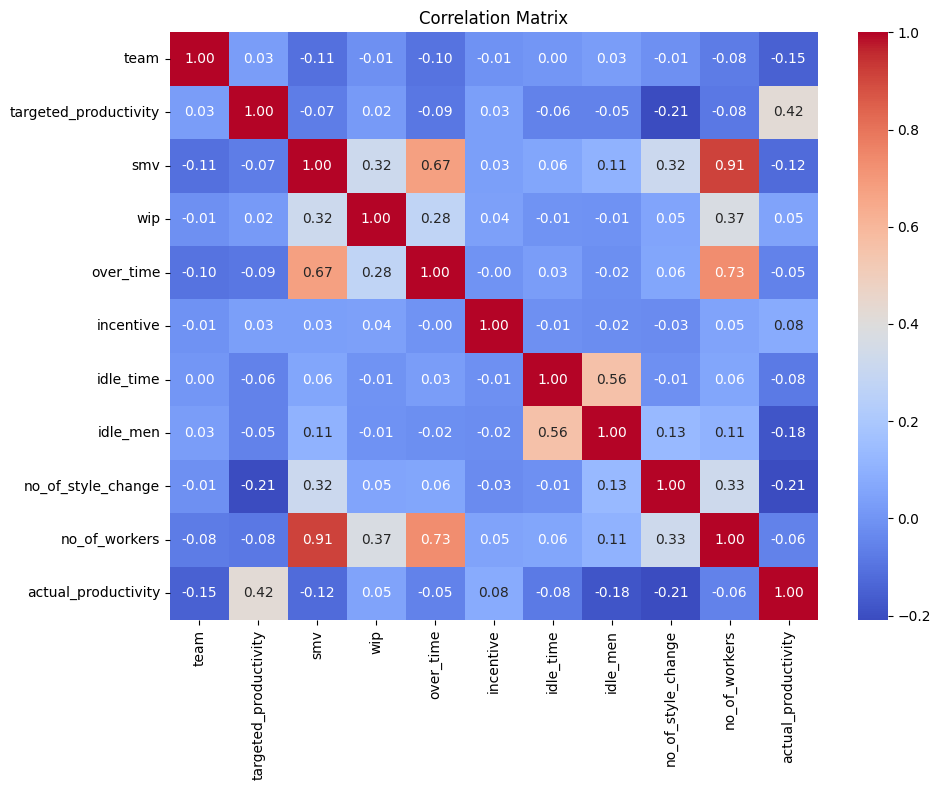

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# **Result Hypothesis**

In [ ]:
ContinesColumn_result, comperativeColumn_result = hypothesisTesting(df, continuous_columns , category_columns)

In [ ]:
ContinesColumn_result_df = pd.DataFrame(ContinesColumn_result)
ContinesColumn_result_df

,team,smv,wip,over_time,incentive,idle_time,idle_men,actual_productivity,no_of_workers
Population Mean,6.43,15.06,690.19,4567.46,38.21,0.73,0.37,0.74,34.61
Sample Means,{6.453347280334728},{14.879187238493722},{694.8517782426778},{4497.706589958159},{38.977824267782424},{1.023744769874477},{0.3662133891213389},{0.7337491960101465},{34.559518828451885}
H0_accepted,119,117,69,129,49,12,97,122,126
H0_rejected,120,122,170,110,190,227,142,117,113
Conclusion,"H0 is rejected, Ha is accepted, There is a sig...","H0 is rejected, Ha is accepted, There is a sig...","H0 is rejected, Ha is accepted, There is a sig...","H0 is accepted, Ha is rejected, There is no si...","H0 is rejected, Ha is accepted, There is a sig...","H0 is rejected, Ha is accepted, There is a sig...","H0 is rejected, Ha is accepted, There is a sig...","H0 is accepted, Ha is rejected, There is no si...","H0 is accepted, Ha is rejected, There is no si..."


In [ ]:
comperativeColumn_result

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,NaN,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is a relationship,There is no relationship
quarter,There is a relationship,NaN,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is a relationship,There is no relationship,There is a relationship,There is no relationship,There is a relationship,There is a relationship,There is no relationship
department,There is a relationship,There is a relationship,NaN,There is no relationship,There is a relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship
day,There is a relationship,There is a relationship,There is no relationship,NaN,There is a relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is a relationship,There is no relationship,There is a relationship,There is a relationship
team,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship
targeted_productivity,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is a relationship,NaN,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is a relationship,There is no relationship,There is a relationship,There is a relationship,There is no relationship
smv,There is a relationship,There is a relationship,There is no relationship,There is a relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship
wip,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship
over_time,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship
incentive,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is no relationship,There is a relationship,There is no relationship,There is no relationship


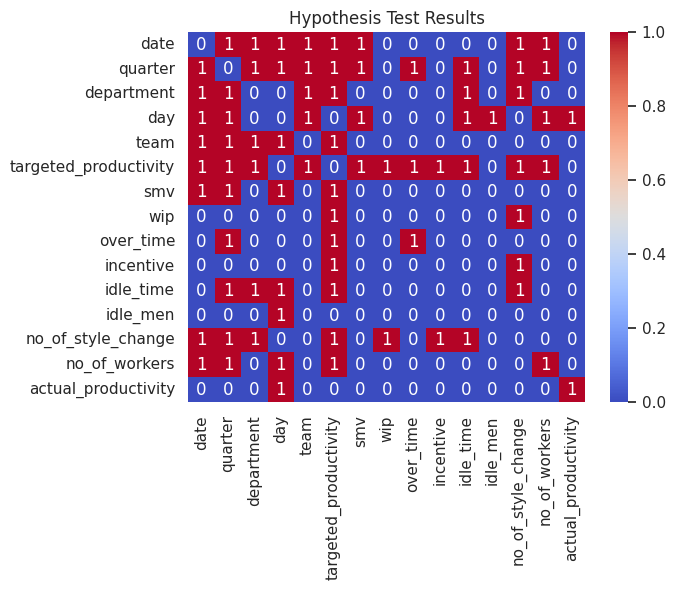

In [ ]:
# Create a heatmap
sns.heatmap(comperativeColumn_result == 'There is a relationship', annot=True, cmap='coolwarm')
plt.title('Hypothesis Test Results')
plt.show()

In [ ]:
sns.set()
comperativeColumn_result.fillna(3, inplace = True)
comperativeColumn_result.replace({'There is a relationship': 0, 'There is no relationship': 1}, inplace=True)
fig = px.imshow(comperativeColumn_result, color_continuous_scale='Viridis',
                title="Correlation Matrix")
fig.show()

# **Data Visualization**

In [ ]:
correlation_matrix = df.corr()
fig = px.imshow(correlation_matrix, color_continuous_scale='Viridis',
                title="Correlation Matrix")
fig.show()

In [ ]:
df.head(5)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0.00,0.00,2.00,3.00,8,0.80,26.16,1108.00,7080,98,0.00,0,0,59.00,0.94
1,0.00,0.00,1.00,3.00,1,0.75,3.94,7.00,960,0,0.00,0,0,8.00,0.89
2,0.00,0.00,2.00,3.00,11,0.80,11.41,968.00,3660,50,0.00,0,0,30.50,0.80
3,0.00,0.00,2.00,3.00,12,0.80,11.41,968.00,3660,50,0.00,0,0,30.50,0.80
4,0.00,0.00,2.00,3.00,6,0.80,25.90,1170.00,1920,50,0.00,0,0,56.00,0.80


In [ ]:
len(df.date.unique())

59

In [ ]:
import plotly.express as px

# Assuming df is your pandas DataFrame
fig1 = px.bar(df, x='quarter', y=['targeted_productivity', 'actual_productivity'],
              title='Comparison of Targeted vs Actual Productivity by Quarter')
fig1.update_layout(xaxis_title='Quarter', yaxis_title='Productivity', barmode='group')
fig1.show()


In [ ]:
df.department.unique()

array([2., 1., 0.])

In [ ]:
fig = px.bar(df, x='department', y='actual_productivity',
             title='Actual Productivity by Department')
fig.update_layout(xaxis_title='Department', yaxis_title='Actual Productivity')
fig.show()

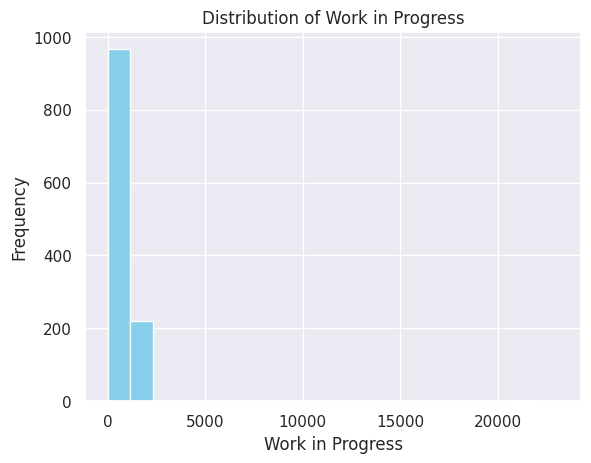

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of 'wip' (work in progress) column
plt.hist(df['wip'], bins=20, color='skyblue')
plt.xlabel('Work in Progress')
plt.ylabel('Frequency')
plt.title('Distribution of Work in Progress')
plt.show()


In [ ]:
fig = px.box(df, x='quarter', y='targeted_productivity', title='Box plot of quarter by targeted_productivity')
fig.show()

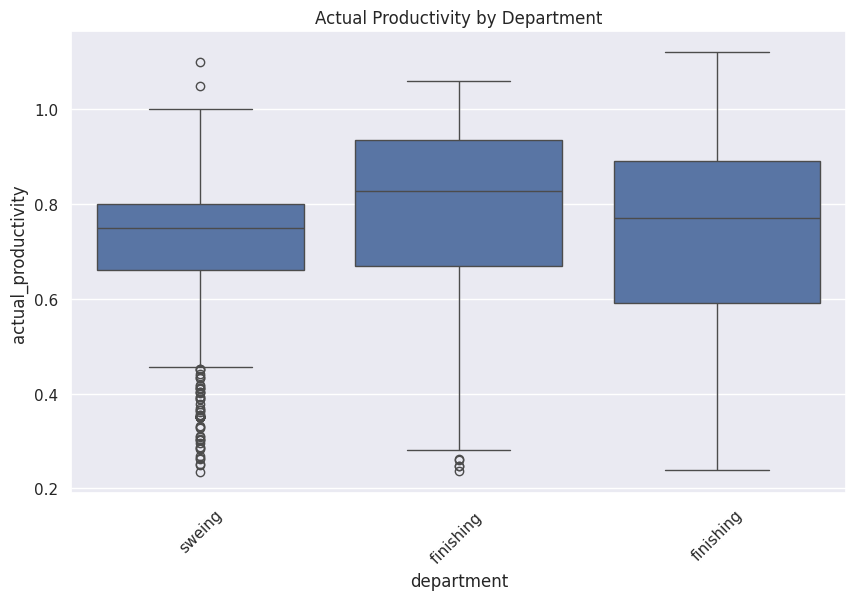

In [ ]:
# Plot boxplot of 'department' vs. 'actual_productivity'
plt.figure(figsize=(10, 6))
sns.boxplot(x='department', y='actual_productivity', data=df)
plt.title('Actual Productivity by Department')
plt.xticks(rotation=45)
plt.show()


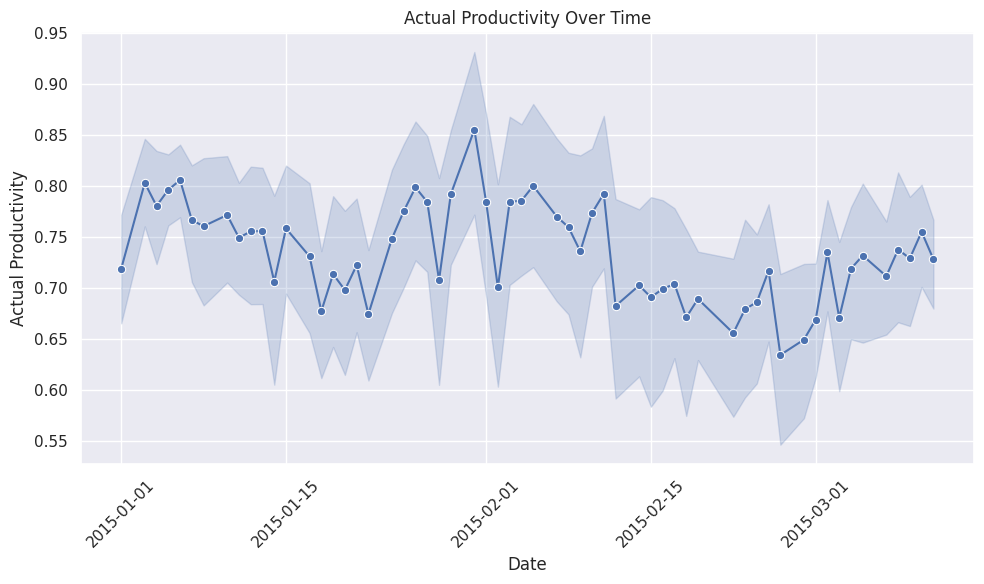

In [ ]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by date
df.sort_values(by='date', inplace=True)

# Plot the line plot using Seaborn and Matplotlib
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='date', y='actual_productivity', marker='o')
plt.title('Actual Productivity Over Time')
plt.xlabel('Date')
plt.ylabel('Actual Productivity')

# Set x-axis ticks and labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Preprocessing**

In [ ]:
# Replacing categorical values with numerical equivalents

In [ ]:
columns = ["quarter","department","day","date"]
encode=OrdinalEncoder()
for i in columns:
  df[i]=encode.fit_transform(df[[i]])

In [ ]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0.00,0.00,2.00,3.00,8,0.80,26.16,1108.00,7080,98,0.00,0,0,59.00,0.94
1,0.00,0.00,1.00,3.00,1,0.75,3.94,7.00,960,0,0.00,0,0,8.00,0.89
2,0.00,0.00,2.00,3.00,11,0.80,11.41,968.00,3660,50,0.00,0,0,30.50,0.80
3,0.00,0.00,2.00,3.00,12,0.80,11.41,968.00,3660,50,0.00,0,0,30.50,0.80
4,0.00,0.00,2.00,3.00,6,0.80,25.90,1170.00,1920,50,0.00,0,0,56.00,0.80


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   float64
 1   quarter                1197 non-null   float64
 2   department             1197 non-null   float64
 3   day                    1197 non-null   float64
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
df.isnull().sum().sum()

0

# **Machine Learning**

In [ ]:
# 1 data availability
# 2 separating independent and dependent
# 3 identifying algorithms/Model
# 4 training
# 5 evaluation

In [ ]:
x=df.drop(['actual_productivity'], axis=1)
y=df['actual_productivity']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor().fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
# 5 evaluation
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r_sqd = r2_score(y_test, y_pred)
print("\nR2_Score:", r_sqd)

Mean Squared Error: 0.01271226271205466

R2_Score: 0.5959131054857697
